In [65]:
from IPython.display import Image
from IPython.core.display import HTML

Image(url= "http://pics3.kunversion.com/listingphotos239/43903-1.jpg")


# Housing Price Prediction for Ames (IA) - CS 109A Final Project


## Meta
* Project Team: Emre Erdem, Michael Harand
* TF: Yunhan Xu


In [66]:
HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


---
---

## Contents

[1. Executive Summary](#execsum)

[2. Data Collection and Description](#datacol)

[3. Data Visualization](#datavis)

[4. Data Cleaning and Preparation](#dataclean)

    a.  Eliminate rows with outliers in the data
    b.  Filling Missing Data with KNN
    c.  Eliminate highly correlated variables
    d.  Create Dummy variables
    
[5. Modeling](#modeling)

    a.  Baseline linear model
    b.  Regressor Models
    c.  Dimensionality Reduction
    d.  Regularization
    e.  Prediction

[Appendix](#appendix)



---
---
<br> 
<br> 
<br> 
<br> 



<span style="font-size:1.7em;"><a id='execsum'></a>1. Executive Summary</span>

#### Objective

The first objective of this project was to predict housing prices as accurately as possible. Using ridge regression, we are able to explain 93% of the variance in the target variable SalePrice and can predict prices within a 95% confidence interval of +- 30k$.

The second objective of this project was to identify the most influential variables for housing prices. Using lasso regression, we can show that 9 variables explain roughly 80% of the variance. All 8 variables are derived from housing-specific data from the main dataset (as opposed to contextual data), which leads to the conclusion that the latter has only marginal explanatory value.

#### Data Cleaning and Preparation
The main dataset from kaggle was joined to manually collected contextual data using the year of the sale, resulting in a dataset with 120 columns and about 118 potential predictor variables, over 90 of which can be considered categorical. 

We eliminated 108 observations containing outliers for variables with more than 25 unique values. Outliers are very conservatively defined as lying outside 4 standard deviations of an assumed normal distribution; this is being done to limit the loss of data and account for distributions that are not overly similar to a normal distribution.

After imputation of missing values in about 20 variables using KNN, the accuracy of which improved after outlier removal, we eliminated 36 variables that were highly correlated to similar variables; most of those variables were contextual variables such as crime rates, GDP figures and life expectancy. 

After this elimination, we created dummy variables for all categorical values with 15 unique values or less; the limit is chosen to best reflect the nature of the variables. Moreover polynomial terms were created, using AIC and BIC to assess their contribution to the model.The resulting final dataset contains 1392 observations and 406 variables including the target variable. 

#### Modeling

Since our target variable is continous, our preferred modeling approach was to use regression techniques. Our baseline linear regression model achieved a 88% test set R2 score. KNN Regression, SVM Regression and Random Forest Regression failed to beat this benchmark. After we added polynomial terms, we have increased test set R2 score of our linear regression model to 90%.

We also used PCA to assess the potential to reduce the dimensionality, testing for 1 through the total number of variables in the dataset as parameter for the number of components. The R2 scores maxes out for a linear combination of 189 variables. While this might be a technically valid result and PCA might be used for prediction purposes, interpretability is very limited.

We therefore turned to regularization; evaluating the cross-validated scores of a range of lambdas we obtain the highest score of 93% for ridge and 92% for lasso; the latter corresponds to 362 non-zero variables.
In order to find the most influential variables we calculated the plotted the score against the number of non-zero variables as produced by lasso regression with a range of lambdas:





In [64]:
Image(url= "https://s28.postimg.org/4qevjjfx9/lassovar.png")

The above chart shows a significant change in the slope of the curve above 9 variables. While roughly 80% of the variance is explained by the following 9 variables, a gain in explained variance can only be obtained by adding several variables above that point.
•	LotArea2
•	GrLivArea2
•	BsmtUnfSF2
•	1stFlrSF2
•	BsmtFinSF12
•	LotFrontage2
•	EnclosedPorch2
•	ScreenPorch2

It seems that degree two versions of our features made the list. Variables that signify the size of the house and garden such as lot, living area, basement and porch have highest predictive power of the price of the house.

#### Conclusion

While there is a trade-off to be made between prediction accuracy and model simplicity, we believe 9 variables represent the sweet-spot for the given dataset. However in order to make the most accurate prediction, we employed all variables. Together with a cross validated Ridge Regression with tuned hyperparameter, we were able to predict the housing price  +- $30k with a 95% confidence level.

<br><br><br><br> 
<br> <br> <br> <br> 




<span style="font-size:1.7em;"><a id='datacol'></a>2. Data Collection and Description</span>

### Primary data: Housing Data

The Ames Housing dataset was compiled by Dean De Cock for use in data science education.  The dataset includes 1460 observations with 79 predictor variables describing most aspects of residential homes in Ames, Iowa. The dataset has been acquired from Kaggle ( https://www.kaggle.com/c/house-prices-advanced-regression-techniques ).

You can find the brief description of the variables below:

    SalePrice - the property's sale price in dollars. This is the target variable
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale


### Secondary Data

Data that is not an attribute of the property being sold or its sales referred to as secondary (or 'contextual') data is. A brief literature review (see Appendix) on potential secondary variables relevant for the housing market revealed to the following subgroups:
1. **Demographics**, e.g. age, race, gender, income, migration and population growth as well as security data)
2. **Macro-Economics**, e.g. GDP, employment, consumer price indexes and interest rates)
3. **Government Policies and Subsidies**, e.g. tax benefits for home buyers and the like
4. **Geographical Factors**, e.g. location, views, facilities, neighbourhood, nearby transactions, transportation, weather and climate
5. **Autoregressive Factors** such as relf-reinforcing trends ('herd-effects') or cyclical patterns. Can be trends that originally stem from a predictor that is not present in the dataset as a variable (as not measurable, e.g. the 'trendiness' of a borough)

Linkage between primary and secondary data is typically possible using time or geographic information. Unfortunately the only time information available is the year of the sale, which is not very granular. As for geography, there is an abbreviated borough available, but no coordinates or street names. While the yearly level might be a smaller problem for the linkage with broader socio-economic data such as population growth, security etc., we cannot deepen the analysis of effects such as seasonal cycles or single economic phenomena (sub-prime crisis!). The same holds true for the lack of geographical information.

Given these reflections, the the following variables wer collected and retained for a timeframe corresponding to that of the primary data (2006 - 2010)

1. **GDP per capita index per 2-digit industry classification**
 1. Construction
 2. Wholesale trade
 3. Information
 4. Finance and insurance
 5. Real estate and rental and leasing
 6. Professional, scientific, and technical services
 7. Management of companies and enterprises
 8. Administrative and waste management services
 9. Educational services
 10. Health care and social assistance
 11. Arts, entertainment, and recreation
 12. Accommodation and food services
 13. Other services, except government

2. **Personal Income per capita, USD, Story County IA**

3. **Criminal statistics**
 1. Violent crime total
 2. Forcible rape
 3. Robbery
 4. Aggravated assault
 5. Property crime total
 6. Burglary
 7. Larceny-theft
 8. Motor vehicle theft

4. **Mortgage Rates**
 1. 30 year mortgage rate
 2. 30 year mortgage rate, June reading

5. **Employment Data**
 1. Labour force, non-farm, June data
 2. Labour force, non-farm, yearly average
 3. Labour force, total, June data
 4. Labour force, total, yearly average

6. **Consumer Price Indexes (Midwest region)**
 1. Consumer Price Index, Midwest, June
 2. Consumer Price Index, Midwest, Annual

Notes:
* Most publicly available demographic data is based on the census, which is a decennial event. Therefore unfortunately very little demographic data can be obtained on a yearly level.

* June is a month with historically high sales volumes and a significant shift in employment; therefore june readings are used as separate variables for otherwise yearly aggregated data.

* Mortgage rates do seem to be fairly homogeneous across different states due to macro-economic forces at play, for which reason no 'localized' rates were acquired; moreover, mortgage rates of different terms (30 years, 15 years and 5 years) are highly correlated, so we only take the 30year instance as a proxy. Moreover, mortgage rates serve as an excellent proxy for all sorts of interest rates.

We have merged housing and contextual data sets together and ended up with the following data structure.

<br> 
<br> 

In [32]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.neighbors import KNeighborsRegressor as KNNr
from sklearn.cross_validation import train_test_split as sk_split
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.cross_validation import cross_val_score as cvscore
%matplotlib inline

In [33]:
maindata = pd.read_csv('maindata.csv')
print 'Shape of the main data frame:', maindata.shape

contextualdata = pd.read_csv(filepath_or_buffer = 'contextualdata.csv')
print 'Shape of the contextual data frame:', contextualdata.shape

data = pd.merge(maindata, contextualdata, left_on='YrSold', right_on='YEAR')
print 'Shape of the joint data frame:', data.shape

Shape of the main data frame: (1460, 81)
Shape of the contextual data frame: (10, 39)
Shape of the joint data frame: (1460, 120)


Analysing the granularity of the data shows that there are many columns with non-continuous data

In [34]:
ColumnStats = pd.DataFrame(columns=['Column','Type','UniqueValues'])
for c in data.columns:
    ColumnStats.loc[len(ColumnStats)]=[data[c].name,data[c].dtype,len(set(data[c]))]

ColumnStats.sort_values(by=['UniqueValues'], ascending=[0], inplace = True)
print ColumnStats.head(30)

           Column     Type  UniqueValues
0              Id    int64        1460.0
4         LotArea    int64        1073.0
46      GrLivArea    int64         861.0
37      BsmtUnfSF    int64         780.0
43       1stFlrSF    int64         753.0
38    TotalBsmtSF    int64         721.0
80      SalePrice    int64         663.0
34     BsmtFinSF1    int64         637.0
62     GarageArea    int64         441.0
44       2ndFlrSF    int64         417.0
3     LotFrontage  float64         369.0
26     MasVnrArea  float64         335.0
66     WoodDeckSF    int64         274.0
67    OpenPorchSF    int64         202.0
59    GarageYrBlt  float64         178.0
36     BsmtFinSF2    int64         144.0
68  EnclosedPorch    int64         120.0
19      YearBuilt    int64         112.0
70    ScreenPorch    int64          76.0
20   YearRemodAdd    int64          61.0
12   Neighborhood   object          25.0
45   LowQualFinSF    int64          24.0
75        MiscVal    int64          21.0
69      3SsnPorc

<br> <br> <br> <br> 
<span style="font-size:1.7em;"><a id='datavis'></a> 3. Data Visualization</span>

Understand nature of dependent variable through histogram plot:

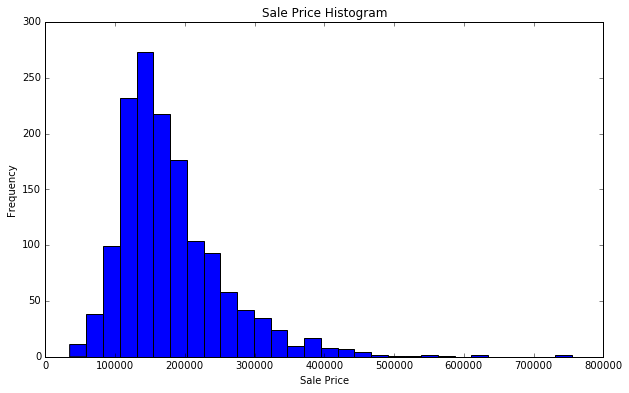

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plt.hist(data['SalePrice'],30)
plt.xlabel('Sale Price'); 
plt.ylabel('Frequency')
plt.title('Sale Price Histogram')
plt.show()

Sales price histogram shows that there is a close to normal distribution with some highly priced outliers. Now let's visualize which variables are correlated with our dependent variable and plot the data. 

**Compute matrix of correlation coefficients and display it as a heat map**

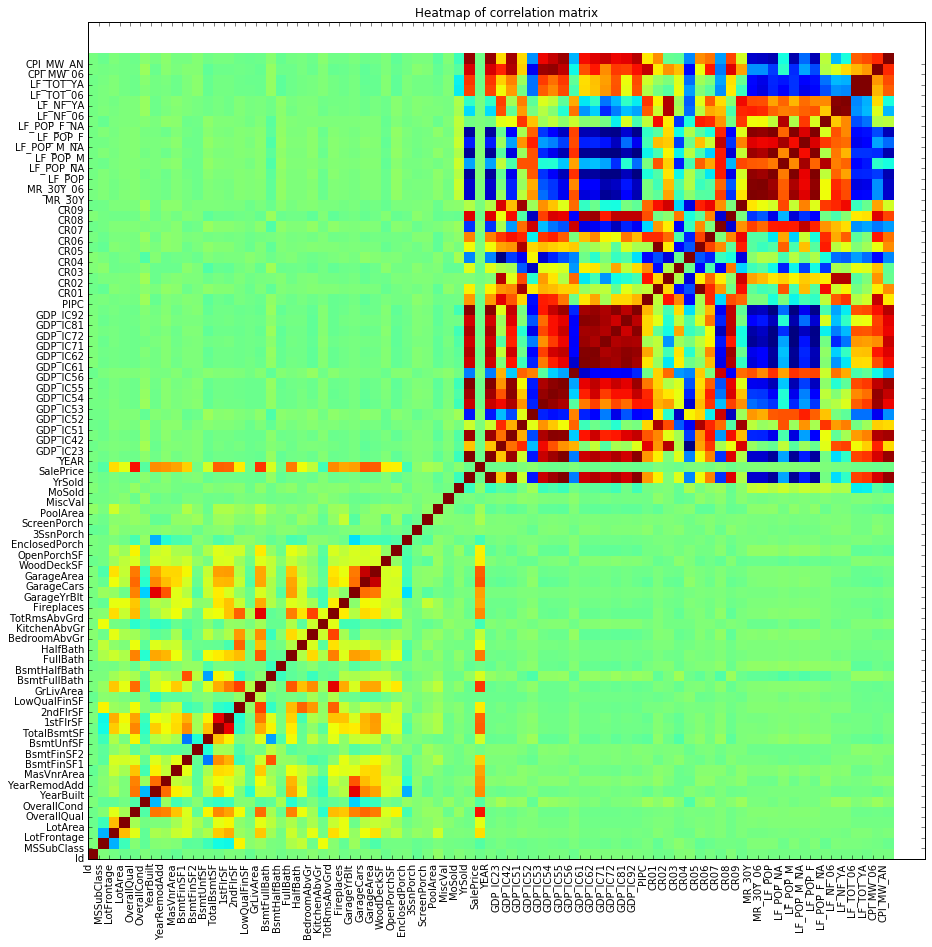

In [36]:
# Compute matrix of correlation coefficients
corr_matrix = data.corr(method='pearson')
# Display heat map 
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ax.pcolor(corr_matrix)
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)
ax.set_xticks(np.arange(0, len(corr_matrix), 1))
ax.set_yticks(np.arange(0, len(corr_matrix), 1))
ax.set_title('Heatmap of correlation matrix')
plt.show()

Now we will calculate correlation with Sales Price for each variable in descending order.
Then we will plot sales price and each predictor variable there is a of either positive or negative %5.

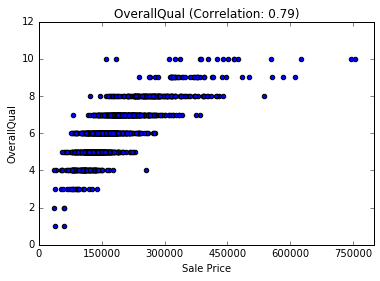

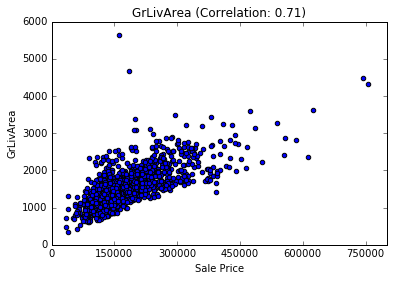

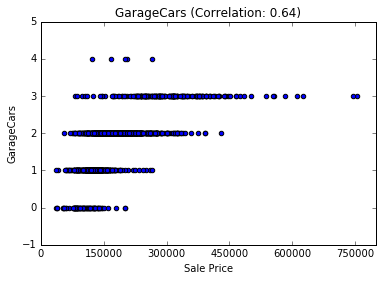

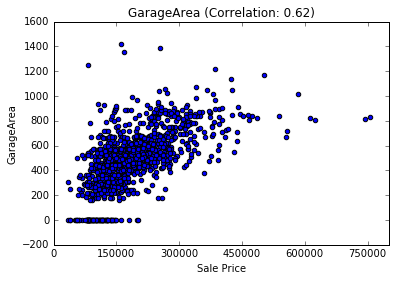

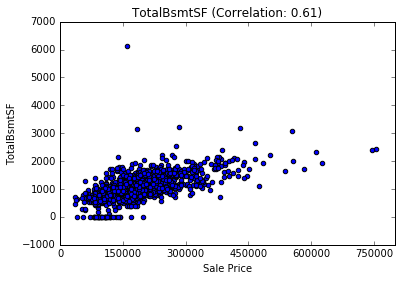

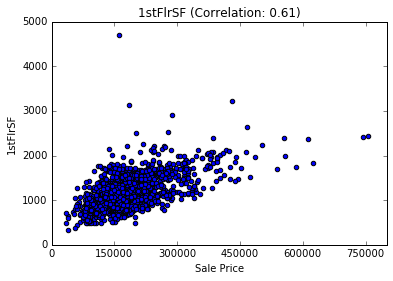

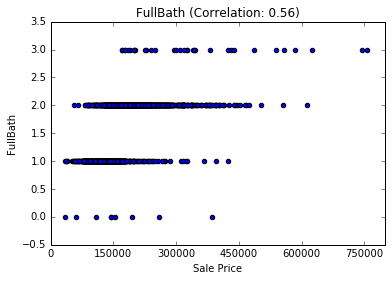

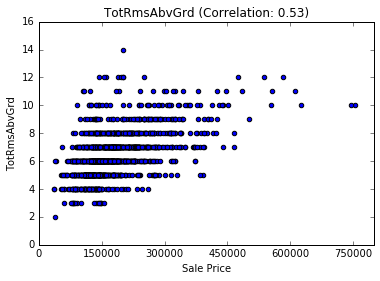

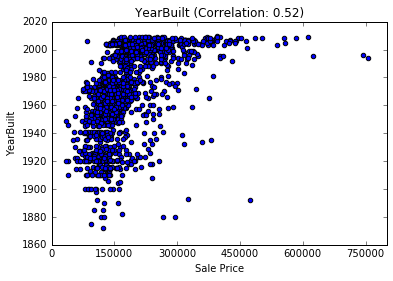

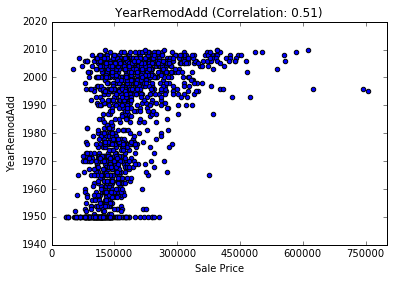

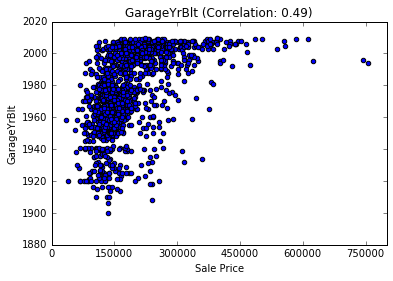

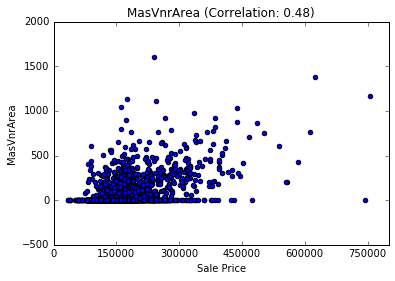

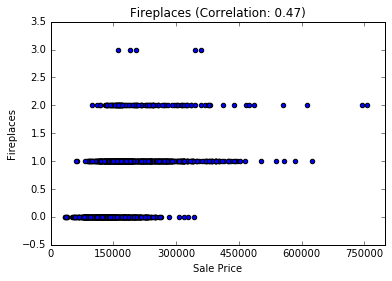

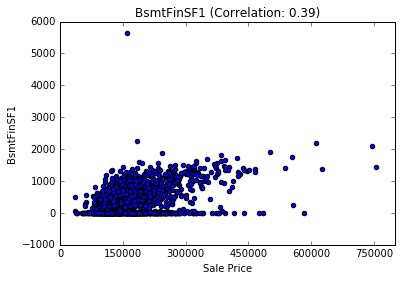

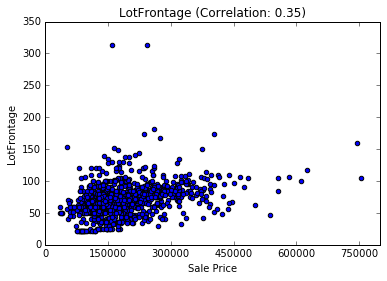

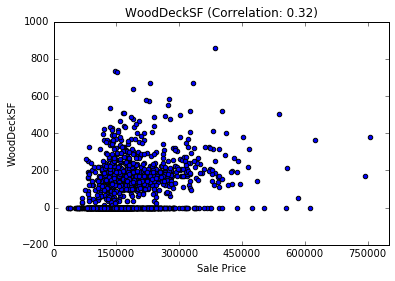

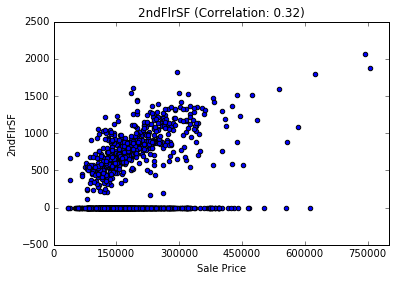

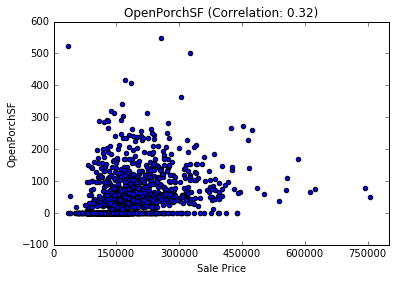

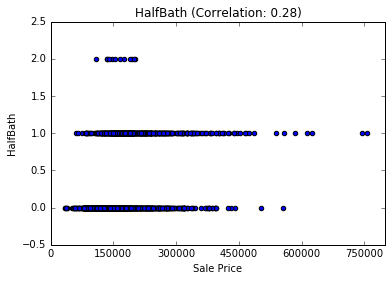

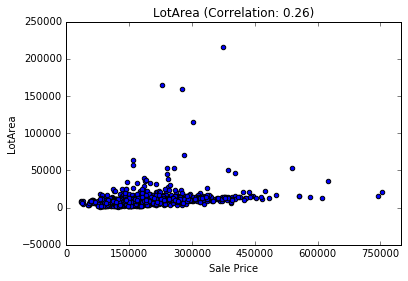

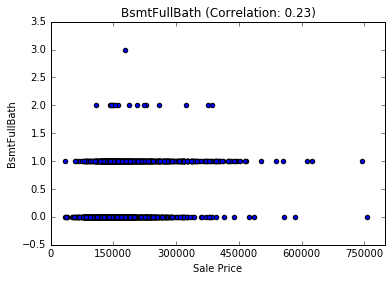

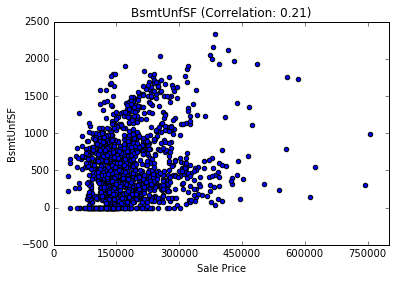

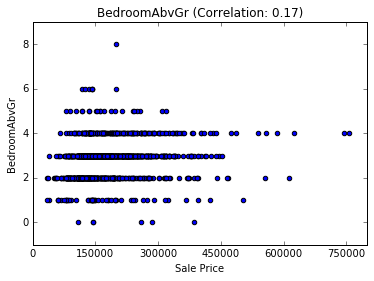

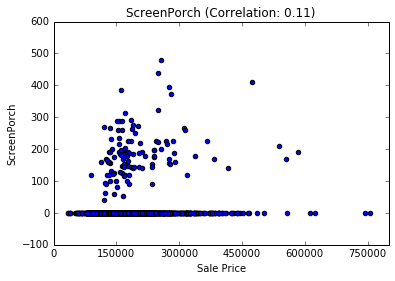

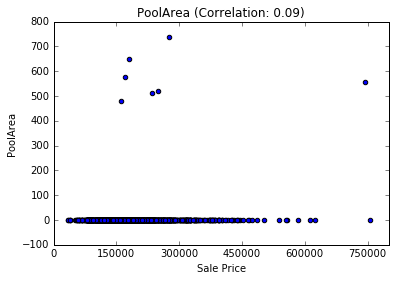

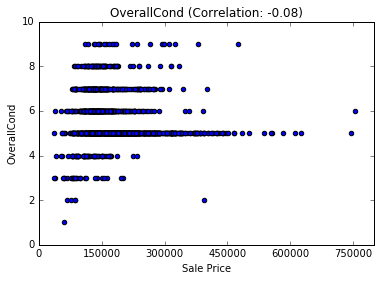

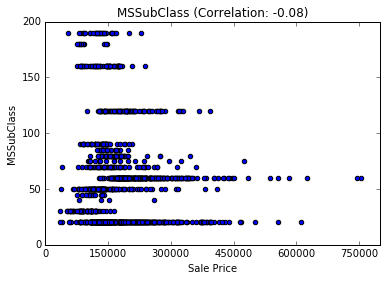

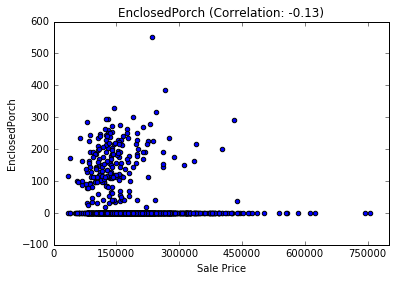

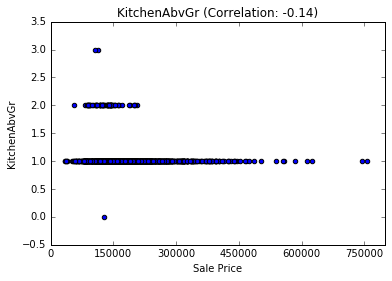

In [37]:
#Delete correlation with self for Sales Price
corr_matrix = corr_matrix.drop(['SalePrice'])
#Calculate correlation with Sales Price in descending order
corr_matrix['SalePrice'].sort_values(ascending=False)

ass_corr = corr_matrix['SalePrice'].sort_values(ascending=False)

#Plot sales price and predictor variable in scatter plot if correlation is over either positive or negative %5 
for i in range(len(ass_corr)):
    if ((ass_corr[i] > 0.05) | (ass_corr[i] < -0.05)): 
        plt.scatter(data['SalePrice'], data[ass_corr.index[i]])
        plt.xlabel('Sale Price')
        plt.title(ass_corr.index[i] + ' (Correlation: ' + str(round(ass_corr[i],2)) +')')
        plt.ylabel(ass_corr.index[i])
        plt.xticks(np.arange(0, max(data['SalePrice'].values), 150000))
        plt.xlim(0)
        plt.show()

Correlation analysis with the dependent variable (SalePrice) showed that there are highly correlated predictor variables. We can see that there are highly correlated variables over %50 (OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd) with sales price and data visualization confirms a pattern. For example the highest correlated variable OverallQual shows a curved pattern which might mean that polynomial models might be more appropriate, while a more linear relationship can be observed with GrossLivArea. 

<br> <br> <br> <br> 
<span style="font-size:1.7em;"><a id='dataclean'></a> 4. Data Cleaning and Preparation</span>

## a. Eliminate rows with outliers in the data

We are eliminating outliers in explanatory and target variables for all numeric columns with more than 25 distinct values; all other columns can be considered categorical, or the distribution of the data is too different from a normal distribution so that too many values would be eliminated. For the same reason we define outliers very conservatively as values lying **outside 4 standard deviations**. Despite these restrictive rules, 11.8% of the data contains an outlier in at least one column.

In [38]:
data['Outliers'] = 0 # column to store the number of outliers for each observation

# We are eliminating outliers for columns with at least
OutlierColumns = ColumnStats[ColumnStats.UniqueValues > 25] # YearRemodAdd and above (see list above)
OutlierColumns = OutlierColumns[OutlierColumns.Type <> 'object'] # for numerical data only
OutlierColumns = OutlierColumns[OutlierColumns.Column <> 'Id'] # obviously

for c in OutlierColumns.Column:
    aCol = data[c].copy()
    outliers = (aCol-aCol.mean()).abs() > 4*aCol.std()
    data['Outliers'] += outliers*1 # transforming true/false into 1/0
    print c, np.sum(outliers)

ols = data.Outliers.values
print '(Percentage of) rows containing at least one outlier: (', np.round(len(data)/float(len(ols[ols>0])),1), ')', len(ols[ols>0])

data = data[data.Outliers == 0]
print 'Shape of the data frame after outlier removal:', data.shape

data.drop('Outliers', axis=1, inplace=True)

LotArea 10
GrLivArea 5
BsmtUnfSF 1
1stFlrSF 4
TotalBsmtSF 5
SalePrice 9
BsmtFinSF1 1
GarageArea 3
2ndFlrSF 0
LotFrontage 6
MasVnrArea 13
WoodDeckSF 6
OpenPorchSF 10
GarageYrBlt 0
BsmtFinSF2 25
EnclosedPorch 13
YearBuilt 0
ScreenPorch 22
YearRemodAdd 0
(Percentage of) rows containing at least one outlier: ( 13.5 ) 108
Shape of the data frame after outlier removal: (1352, 121)


Now let's understand amount of missing data for each variable:

In [49]:
#Understand amount of missing data
for column in data:
    if pd.isnull(data[column]).sum() > 0:
        print column, pd.isnull(data[column]).sum() 

LotFrontage 236
Alley 1268
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 37
Electrical 1
FireplaceQu 666
GarageType 79
GarageYrBlt 79
GarageFinish 79
GarageQual 79
GarageCond 79
PoolQC 1349
Fence 1090
MiscFeature 1305


## b. Filling Missing Data with KNN

Looks like we have a lot of missing data with some of the variables, we can use KNN classification or regression depending on the type of variable to fill the missing data.

We will Iterate over all attributes and check if an attribute is categorical: has less than 16 unique values,or has string values (column has type 'object'). Then we will employ a function to fill missing data with KNN classification or regression depending on the type of variable.

In [39]:
# Function to create a new data frame to store one-hot encoding of attributes
def expand(df):
    df_expanded = pd.DataFrame({}) 
    
    # Iterate over all attributes
    for column in df.columns:
        # Check if attribute is categorical: has less than 16 unique values,
        # or is string values (column has type 'object')
        if len(df[column].unique()) < 16 or df[column].dtype == np.dtype('object'):
            # use one-hot encoding for this column
            encoding = pd.get_dummies(df[column])
            # append expanded attribute to data frame
            df_expanded = pd.concat([df_expanded, encoding], axis=1)
        else:
            df_expanded = pd.concat([df_expanded, df[[column]]], axis=1)
    
    return df_expanded

#Function to fill missing data with KNN classification or regression depending on the type of variable
def fill_knn(df, fillcol, no_y_ind, with_y_ind,k):
    #preparing data in array form
    y_train = df.loc[with_y_ind,fillcol].values
    
    if len(df[fillcol].unique()) < 16 or df[fillcol].dtype == np.dtype('object'):
        neighbours = KNN(n_neighbors=k)
    else:
        neighbours = KNNr(n_neighbors=k)
        
    df = df.drop([fillcol], axis=1)
    
    notnull_xtrain = pd.DataFrame({}) 
    
    for column in df.columns:
        if pd.isnull(df[column]).sum() == 0:
            notnull_xtrain = pd.concat([notnull_xtrain, df[[column]]], axis=1)
        
    expanded_x_train = expand(notnull_xtrain)
    x_test = expanded_x_train.loc[no_y_ind].values
    expanded_x_train = expanded_x_train.loc[with_y_ind].values
    
    #fit knn model

   
    neighbours.fit(expanded_x_train, y_train)
    
    #predict y-values
    pred_y = neighbours.predict(x_test)
    
    #score predictions
    r = neighbours.score(expanded_x_train, y_train)
       
    return pred_y, r

In [40]:
#Fill missing data with KNN regressor/classifier depending on type of variable
for column in data:
    if pd.isnull(data[column]).sum() > 0:
        no_y_ind = data[data[column].isnull()].index
        with_y_ind = data[data[column].notnull()].index
        pred_y, r = fill_knn(data, column,no_y_ind, with_y_ind,3)
        data.loc[no_y_ind, column] = pd.Series(pred_y, index=no_y_ind)
        print 'Filled', column , 'with R square score of: ' , np.round(r, 2)

Filled LotFrontage with R square score of:  0.69
Filled Alley with R square score of:  0.88
Filled MasVnrType with R square score of:  0.78
Filled MasVnrArea with R square score of:  0.51
Filled BsmtQual with R square score of:  0.82
Filled BsmtCond with R square score of:  0.93
Filled BsmtExposure with R square score of:  0.76
Filled BsmtFinType1 with R square score of:  0.66
Filled BsmtFinType2 with R square score of:  0.92
Filled Electrical with R square score of:  0.92
Filled FireplaceQu with R square score of:  0.72
Filled GarageType with R square score of:  0.8
Filled GarageYrBlt with R square score of:  0.64
Filled GarageFinish with R square score of:  0.75
Filled GarageQual with R square score of:  0.95
Filled GarageCond with R square score of:  0.97
Filled PoolQC with R square score of:  0.67
Filled Fence with R square score of:  0.68
Filled MiscFeature with R square score of:  0.91


Note: We implemented KNN imputation before outlier removal during milestone 4&5. These scores got better after outlier removal.

## c. Eliminate highly correlated variables

Now let's check correlation matrix of the variables to make sure we are avoiding multicollinearity and only including variables that can contribute to our prediction performance

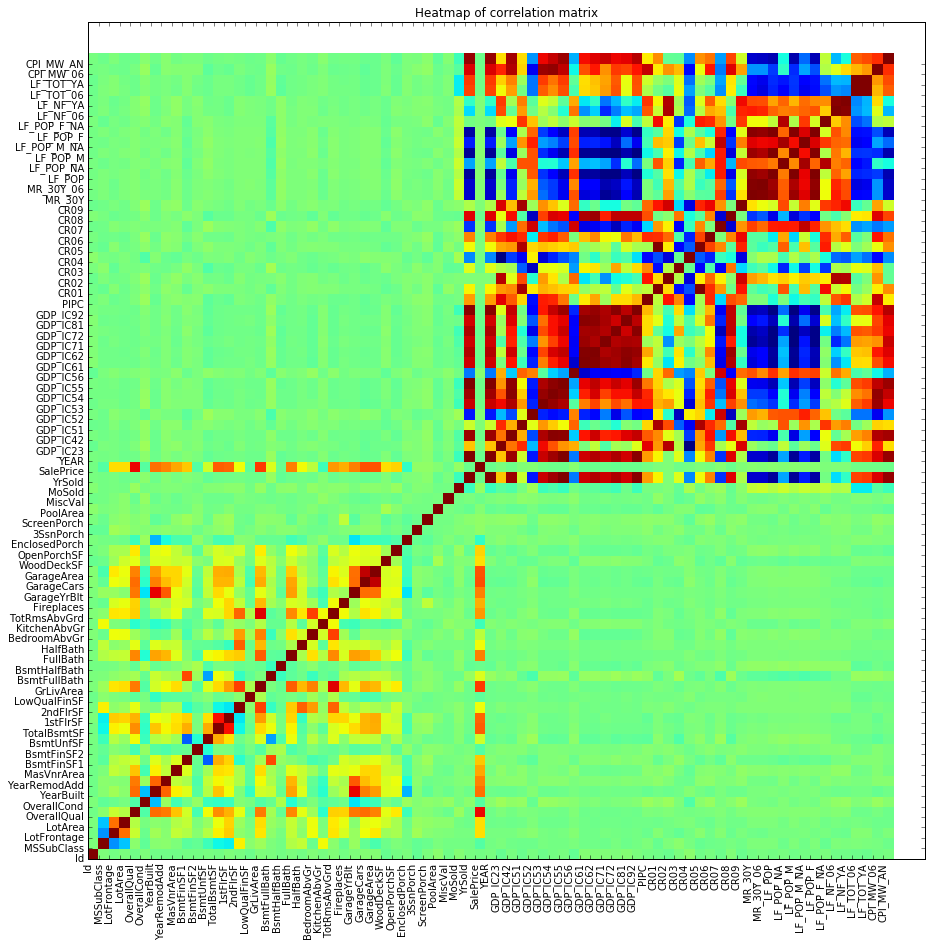

In [55]:
# Compute matrix of correlation coefficients
corr_matrix = data.corr(method='pearson')
# Display heat map 
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ax.pcolor(corr_matrix)
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)
ax.set_xticks(np.arange(0, len(corr_matrix), 1))
ax.set_yticks(np.arange(0, len(corr_matrix), 1))
ax.set_title('Heatmap of correlation matrix')
plt.show()

It looks like we have a lot of highly correlated contextual data. It makes sense to remove very highly correlated variables so we have dropped the following variables:

GDP_IC62,GDP_IC61,GDP_IC71,GDP_IC72,GDP_IC81,GDP_IC92,GDP_IC55,GDP_IC54,GDP_IC53,GDP_IC56,GDP_IC51,GDP_IC52,GDP_IC42,CR02,CR05,CR06,CR07,CR08,CR09,MR_30Y_06,LF_POP_NA,LF_POP_M,LF_POP_F,F_POP_M_NA,LF_POP_F_NA,LF_NF_06,LF_TOT_06,CPI_MW_06,CPI_MW_AN,PIPC,YEAR,YrSold,LF_POP

We have also dropped the following variables from housing data: 
2ndFlrSF, TotalBsmtSF, GarageCars 
 

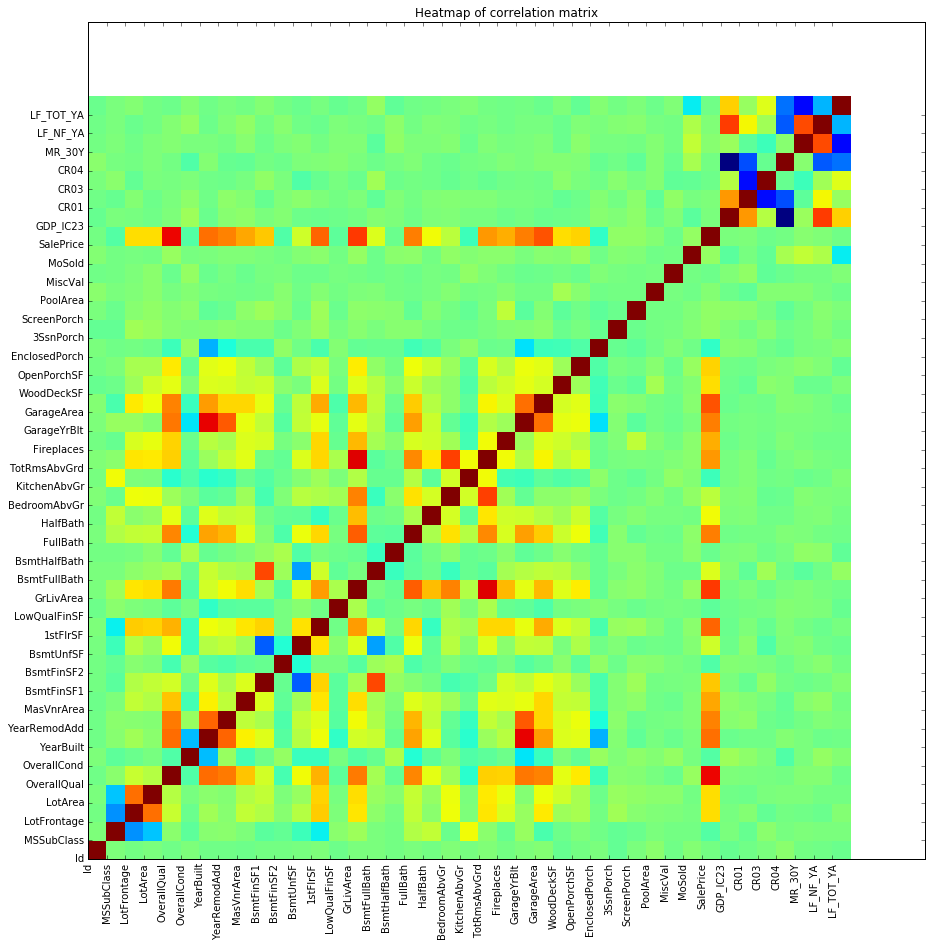

Shape of our data after elimination of highly correlated variables:  (1352, 84)


In [41]:
#Delete highly correlated variables
data = data.drop(['GDP_IC62'], axis=1)
data = data.drop(['GDP_IC61'], axis=1)
data = data.drop(['GDP_IC71'], axis=1)
data = data.drop(['GDP_IC72'], axis=1)
data = data.drop(['GDP_IC81'], axis=1)
data = data.drop(['GDP_IC92'], axis=1)
data = data.drop(['GDP_IC55'], axis=1)
data = data.drop(['GDP_IC54'], axis=1)
data = data.drop(['GDP_IC53'], axis=1)
data = data.drop(['GDP_IC56'], axis=1)
data = data.drop(['GDP_IC51'], axis=1)
data = data.drop(['GDP_IC52'], axis=1)
data = data.drop(['GDP_IC42'], axis=1)
data = data.drop(['CR02'], axis=1)
data = data.drop(['CR05'], axis=1)
data = data.drop(['CR06'], axis=1)
data = data.drop(['CR07'], axis=1)
data = data.drop(['CR08'], axis=1)
data = data.drop(['CR09'], axis=1)
data = data.drop(['MR_30Y_06'], axis=1)
data = data.drop(['LF_POP_NA'], axis=1)
data = data.drop(['LF_POP_M'], axis=1)
data = data.drop(['LF_POP_F'], axis=1)
data = data.drop(['LF_POP_M_NA'], axis=1)
data = data.drop(['LF_POP_F_NA'], axis=1)
data = data.drop(['LF_NF_06'], axis=1)
data = data.drop(['LF_TOT_06'], axis=1)
data = data.drop(['CPI_MW_06'], axis=1)
data = data.drop(['CPI_MW_AN'], axis=1)
data = data.drop(['PIPC'], axis=1)
data = data.drop(['YEAR'], axis=1)
data = data.drop(['YrSold'], axis=1)

data = data.drop(['2ndFlrSF'], axis=1) 
data = data.drop(['TotalBsmtSF'], axis=1) 
data = data.drop(['GarageCars'], axis=1) 
data = data.drop(['LF_POP'], axis=1) 


# Compute matrix of correlation coefficients again
corr_matrix = data.corr(method='pearson')
# Display heat map 
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ax.pcolor(corr_matrix)
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)
ax.set_xticks(np.arange(0, len(corr_matrix), 1))
ax.set_yticks(np.arange(0, len(corr_matrix), 1))
ax.set_title('Heatmap of correlation matrix')
plt.show()

print 'Shape of our data after elimination of highly correlated variables: ', data.shape

The correlation matrix after dropping some variables looks much better with a lot less variables highly correlated with each other. 



## d. Create dummy variables
We have defined that variables which have less than 16 variables are categorical and got dummy variables for them. 

In [42]:
# Get dummy variables for variables who are categorical or have less than 8 unique values using one-hot encoding of attributes
data = expand(data)

# Split data into training/test data sets
train, test = sk_split(data, test_size = 0.3)

#Set dependent variables and predictors
y_train = train['SalePrice']
y_test = test['SalePrice']
x_train = train.drop(['SalePrice'], axis=1)
x_test = test.drop(['SalePrice'], axis=1)

Shape of the data frame after column removal, creation of derived variables and transformation of categorical variables:

In [60]:
print data.shape
print data.columns.values

(1352, 390)
['Id' 20L 30L 40L 45L 50L 60L 70L 75L 80L 85L 90L 120L 160L 180L 190L
 'C (all)' 'FV' 'RH' 'RL' 'RM' 'LotFrontage' 'LotArea' 'Grvl' 'Pave' 'Grvl'
 'Pave' 'IR1' 'IR2' 'IR3' 'Reg' 'Bnk' 'HLS' 'Low' 'Lvl' 'AllPub' 'NoSeWa'
 'Corner' 'CulDSac' 'FR2' 'FR3' 'Inside' 'Gtl' 'Mod' 'Sev' 'Blmngtn'
 'Blueste' 'BrDale' 'BrkSide' 'ClearCr' 'CollgCr' 'Crawfor' 'Edwards'
 'Gilbert' 'IDOTRR' 'MeadowV' 'Mitchel' 'NAmes' 'NPkVill' 'NWAmes'
 'NoRidge' 'NridgHt' 'OldTown' 'SWISU' 'Sawyer' 'SawyerW' 'Somerst'
 'StoneBr' 'Timber' 'Veenker' 'Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe'
 'RRAn' 'RRNe' 'RRNn' 'Artery' 'Feedr' 'Norm' 'PosN' 'RRAe' 'RRAn' 'RRNn'
 '1Fam' '2fmCon' 'Duplex' 'Twnhs' 'TwnhsE' '1.5Fin' '1.5Unf' '1Story'
 '2.5Fin' '2.5Unf' '2Story' 'SFoyer' 'SLvl' 1L 2L 3L 4L 5L 6L 7L 8L 9L 10L
 1L 2L 3L 4L 5L 6L 7L 8L 9L 'YearBuilt' 'YearRemodAdd' 'Flat' 'Gable'
 'Gambrel' 'Hip' 'Mansard' 'Shed' 'CompShg' 'Metal' 'Roll' 'Tar&Grv'
 'WdShake' 'WdShngl' 'AsbShng' 'AsphShn' 'BrkComm' 'BrkFace' 

<br> <br> <br> <br> 
<span style="font-size:1.7em;"><a id='modeling'></a> 5. Modeling</span>

## a. Baseline Linear Model

Now we are ready to fit our baseline model which is a linear regression.

In [21]:
#Fit linear regression to dataset and assess R square performance
regression = Lin_Reg()
regression.fit(x_train,y_train)
predicted_y = regression.predict(x_test)
R2_train = regression.score(x_train,y_train)
R2_test = regression.score(x_test,y_test)

print 'R2 of the sklearn regression model for training set is: ', round(R2_train, 2)
print 'R2 of the sklearn regression model for test set is: ', round(R2_test, 2)

R2 of the sklearn regression model for training set is:  0.95
R2 of the sklearn regression model for test set is:  0.88


R2 of the linear regression model for test set was 0.82 during Milestone 4&5.
It looks like by outlier removal we have improved the performance of our baseline model significantly.

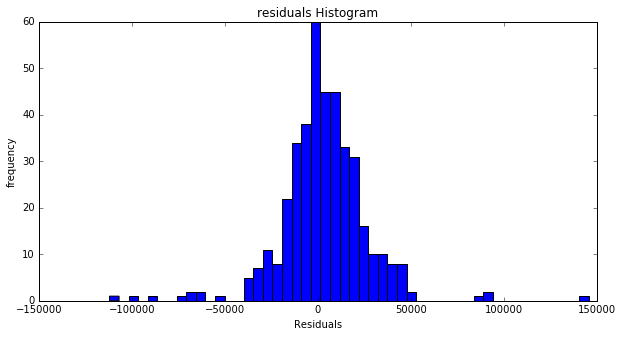

In [18]:
#Plot residuals to assess performance of the model
residuals = predicted_y - y_test

plt.figure(figsize=(10,5))
plt.hist(residuals,50) 
plt.title('residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('frequency')
plt.show()

It seems that our residuals are also much better after outlier removal. During milestone 4&5, there were residuals around the range of 400.000-500.000 which we do not see now. 

As we occasionally saw large negative values for the testing scores we decided to quickly investigate the problem using k-fold cross-validation:

negative scores: 13
average, median score: -44825083.8179 , 0.9
average, median positive score: 0.87 , 0.91


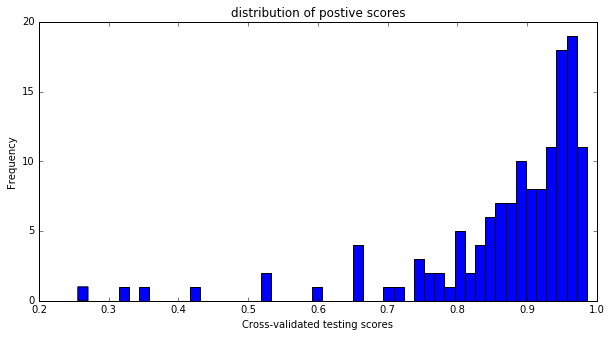

In [22]:

# getting the variables for the undivided dataset
y = data['SalePrice']
x = data.drop(['SalePrice'], axis=1)

# getting the cross-validated scores
scores = cvscore(regression, x, y, cv=150)

# output
print 'negative scores:', len(scores[np.where(scores < 0)])
print 'average, median score:', np.mean(scores),',',np.round(np.median(scores),2)
print 'average, median positive score:', np.round(np.mean(scores[np.where(scores >= 0)]),2),',', np.round(np.median(scores[np.where(scores >= 0)]),2)

plt.figure(figsize=(10,5))
plt.hist(scores[scores>=0],50) 
plt.title('distribution of postive scores')
plt.xlabel('Cross-validated testing scores')
plt.ylabel('Frequency')
plt.show()

There are still a few negative values among the scores, although majority is greater than 0.8, which is very promising. However negative scores indicate that the data is not linear. Therefore adding polynomial terms can improve the performance of our model significantly. We will also try other regressor models to see which ones have the highest R2 score. 

## b. Regressor Models

### KNN Regressor

In [15]:
#Fit KNN regression to dataset and assess R square performance
neighbours = KNNr(n_neighbors=10)
neighbours.fit(x_train,y_train)
R2_train = neighbours.score(x_train,y_train)
R2_test = neighbours.score(x_test,y_test)


print 'R2 of the KNN regression model for training set is: ', round(R2_train, 2)
print 'R2 of the KNN regression model for test set is: ', round(R2_test, 2)


R2 of the KNN regression model for training set is:  0.73
R2 of the KNN regression model for test set is:  0.6


### SVM Regressor

In [9]:
#Fit SVM regression to dataset and assess R square performance
from sklearn.svm import SVR
SVM = SVR(C=1, kernel='linear')
SVM.fit(x_train,y_train)
R2_train = SVM.score(x_train,y_train)
R2_test = SVM.score(x_test,y_test)

print 'R2 of the SVM regression model for training set is: ', round(R2_train, 2)
print 'R2 of the SVM regression model for test set is: ', round(R2_test, 2)


R2 of the SVM regression model for training set is:  0.81
R2 of the SVM regression model for test set is:  0.79


### Random Forest Regressor

In [24]:
#Fit Random Forest regression to dataset and assess R square performance
from sklearn.ensemble.forest import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=150)
RF.fit(x_train,y_train)
R2_train = RF.score(x_train,y_train)
R2_test = RF.score(x_test,y_test)

print 'R2 of the Random Forest regression model for training set is: ', round(R2_train, 2)
print 'R2 of the Random Forest regression model for test set is: ', round(R2_test, 2)


R2 of the Random Forest regression model for training set is:  0.99
R2 of the Random Forest regression model for test set is:  0.87


### Polynomial Regression
We will add polynomial terms for continuous variables and run regression model. We will also examine how many polynomial terms we should incorporate through AIC and BIC scores.

AIC is minimized at degree 2 and yields training set R^2 score 0.952
BIC is minimized at degree 2 and yields training set R^2 score 0.952
Train R^2 score is maximum at degree 4 and yields training R^2 score 0.955


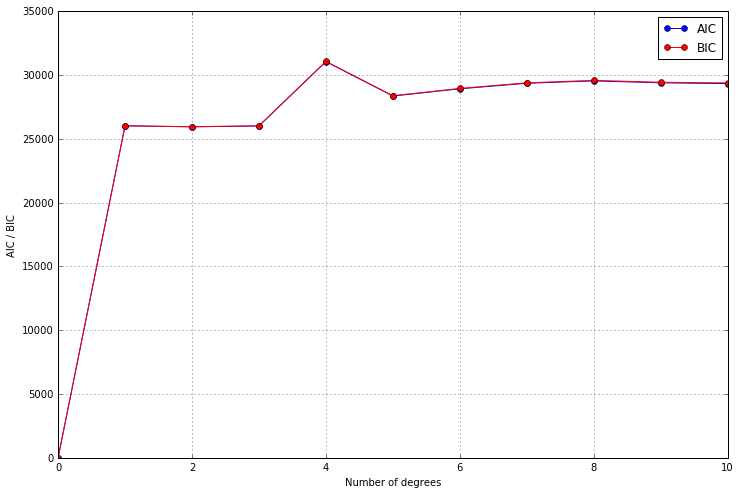

In [23]:
degrees=10
AIC = np.zeros([ degrees+1,1])
BIC = np.zeros([ degrees+1,1])
R2 = np.zeros([ degrees+1,1])
n= len(x)

Continuous = ColumnStats[ColumnStats.UniqueValues > 25] # YearRemodAdd and above (see list above)
Continuous = Continuous[Continuous.Type <> 'object'] # for numerical data only
Continuous = Continuous[Continuous.Column <> 'Id'] # obviously
Continuous = Continuous[Continuous.Column <> 'SalePrice'] # obviously
Continuous = Continuous[Continuous.Column <> 'TotalBsmtSF'] # has been removed before
Continuous = Continuous[Continuous.Column <> '2ndFlrSF'] # has been removed before

#iterate over polynomial degrees and record their R2 performance for both test and training data
for d in range(1, degrees +1):
    for c in Continuous.Column.values:
        x[c+str(d)] = np.power(x[c],d)
    
    regression.fit(x, y)
    y_fit = regression.predict(x)
    R2[d] = regression.score(x, y)
    RSS = np.sum(np.square(y - y_fit))
    
    #Calculate AIC, BIC. 
    AIC[d] = n*np.log(RSS/n) + 2*d
    BIC[d] = n*np.log(RSS/n) + np.log(n)*d
    
    for c in Continuous.Column.values:
        x = x.drop([c+str(d)], axis=1)

plt.figure(figsize=(12,8))
plt.plot(AIC, 'bo-', label=r'AIC')
plt.plot(BIC, 'ro-', label=r'BIC')
plt.xlabel('Number of degrees'); 
plt.ylabel('AIC / BIC')
plt.legend(loc='best')
plt.grid()

# Observation from plot
aic_min_degree = np.argmin(AIC) + 1
bic_min_degree = np.argmin(BIC) + 1
r_sq_max_degree = np.argmax(R2) + 1
r_sq_max = max(R2)
    
print 'AIC is minimized at degree', \
aic_min_degree + 1, \
'and yields training set R^2 score', \
round(R2[aic_min_degree], 3)
        
print 'BIC is minimized at degree', \
bic_min_degree + 1, \
'and yields training set R^2 score', \
round(R2[bic_min_degree], 3)
 
print 'Train R^2 score is maximum at degree', \
r_sq_max_degree + 1, \
'and yields training R^2 score', \
round(r_sq_max, 3)

AIC/BIC scores indicate that polynomial degree of 2 will be optimum.
Let's assess the performance our 2 degree polynomial model together with cross validation:
      

In [44]:
#Add polynomial degree of 2 for continous variables
for c in Continuous.Column.values:
    data[c+str(2)] = np.power(data[c],2)
print data.shape

y = data['SalePrice']
x = data.drop(['SalePrice'], axis=1)

# Split data into training/test data sets
train, test = sk_split(data, test_size = 0.3)

#Set dependent variables and predictors
y_train = train['SalePrice']
y_test = test['SalePrice']
x_train = train.drop(['SalePrice'], axis=1)
x_test = test.drop(['SalePrice'], axis=1)

#Fit linear regression to dataset and assess R square performance
regression = Lin_Reg()
regression.fit(x_train,y_train)
predicted_y = regression.predict(x_test)
R2_train = regression.score(x_train,y_train)
R2_test = regression.score(x_test,y_test)

print 'R2 of the sklearn polynomial regression model for training set is: ', round(R2_train, 2)
print 'R2 of the sklearn polynomial regression model for test set is: ', round(R2_test, 2)


(1352, 406)
R2 of the sklearn polynomial regression model for training set is:  0.96
R2 of the sklearn polynomial regression model for test set is:  0.9


Among the models we have tried, polynomial regression model seems to generate highest test R2 score. Now let's evaluate its performance with cross validation. 

(1352, 406)
negative scores: 1
average, median score: 0.86 , 0.92
average, median positive score: 0.87 , 0.92


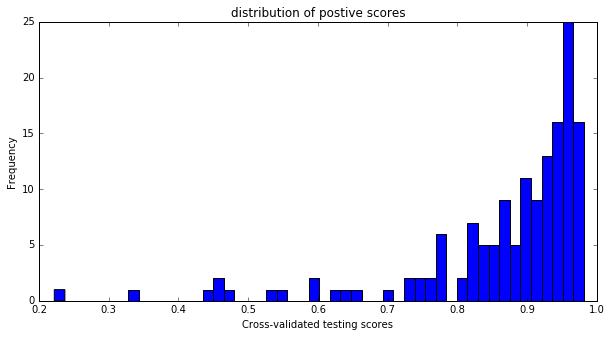

In [65]:
# Let's try regression with the polynomial terms
scores = cvscore(regression, x, y, cv=150)

# output
print 'negative scores:', len(scores[np.where(scores < 0)])
print 'average, median score:', np.round(np.mean(scores),2),',',np.round(np.median(scores),2)
print 'average, median positive score:', np.round(np.mean(scores[np.where(scores >= 0)]),2),',', np.round(np.median(scores[np.where(scores >= 0)]),2)

plt.figure(figsize=(10,5))
plt.hist(scores[scores>=0],50) 
plt.title('distribution of postive scores')
plt.xlabel('Cross-validated testing scores')
plt.ylabel('Frequency')
plt.show()



It looks like polynomial features helped to fit the data, we only have one negative value and our average and median scores improved. 



## c. Dimensionality Reduction
Now we will explore PCA and see how many components would generate the highest R2. If the number of components can be decreased significantly, we might choose to incorporate PCA. 

In [45]:
import sys
import time

from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score as cvscore
from sklearn.decomposition import PCA

# Parameterization for cross-validation
FoldSize = 50 # number of observations per fold of a k-fold cross-validation
NumFolds = int(len(x)/FoldSize) # k, the number of folds of the k-fold cross-validation (depends on the above)

# other
cvp = 1 ## cross-validation parallelism; not sure if this actually works, anything else but 1 seems to slow down
TopN = 15 # Number of lines shown for parameters and scores, per YClass

# setup
kf = KFold(len(x),NumFolds)
plt.rcParams['figure.figsize'] = (6,3)

print 'cross-validation:', NumFolds, 'folds, containing', FoldSize, 'observations each'

cross-validation: 27 folds, containing 50 observations each


In [67]:
print '*** PCA ***'

Components = data.shape[1]-1 # maximum number of linear combinations for PCA
Cs = np.linspace(1,Components,Components)

peh = pd.DataFrame(columns=['Components','Score','ScoreStd']) # parameter evaluation helper

print 'loop started:', len(Cs), 'combinations *', NumFolds, 'cross-validations'
start = time.time()
print '********10********20********30********40********50********60********70********80********90*******100'
i = 0

for c in Cs:
    model = PCA(n_components = i+1)
    model.fit(x)
    xpca = model.transform(x)
    regression.fit(xpca,y)
    scores = cvscore(regression, xpca, y, cv=NumFolds, n_jobs=cvp)
    peh.loc[len(peh)]=[Cs[i],np.mean(scores),np.std(scores)]
    sys.stdout.write('.')
    i+=1

print
peh.sort_values(by=['Score','ScoreStd'], ascending=[0,1], inplace = True)
end = time.time()
print 'elapsed time:', int(end - start), 'seconds \n'
print 'top', TopN, 'parameters and scores:'
print(peh.head(TopN))

*** PCA ***
loop started: 50 combinations * 27 cross-validations
********10********20********30********40********50********60********70********80********90*******100
..................................................
elapsed time: 10 seconds 

top 15 parameters and scores:
    Components     Score  ScoreStd
49        50.0  0.863874  0.048744
48        49.0  0.863203  0.049115
47        48.0  0.861089  0.048370
46        47.0  0.859780  0.046592
45        46.0  0.857386  0.047509
42        43.0  0.857028  0.047304
43        44.0  0.856845  0.047394
39        40.0  0.856608  0.046714
44        45.0  0.856582  0.047447
41        42.0  0.856426  0.046746
40        41.0  0.856415  0.046749
37        38.0  0.829831  0.050423
38        39.0  0.829319  0.051073
36        37.0  0.819075  0.056701
32        33.0  0.817928  0.057408


It seems that PCA with 189 components maximizes R2 score however this does not decrease the number of variables incredibly.  By using PCA we will be also be losing our means to evaluate and interpret variables sensibly, so we decided not to use PCA. 

## d.Regularization

Now we employ Ridge and Lasso regression to see if our prediction performance increases with regularization. We will also employ hyper parameter tuning to find optimum lambda and use the power of cross validation.


### Ridge Regression

Let's employ ridge regression and see if our prediction performance would improve. 
We will first test it with a single run, then we will employ cross validation to assess the difference and have higher accuracy.


Test R^2 score is maximum at lambda 1.061 and yields test R^2 score 0.92


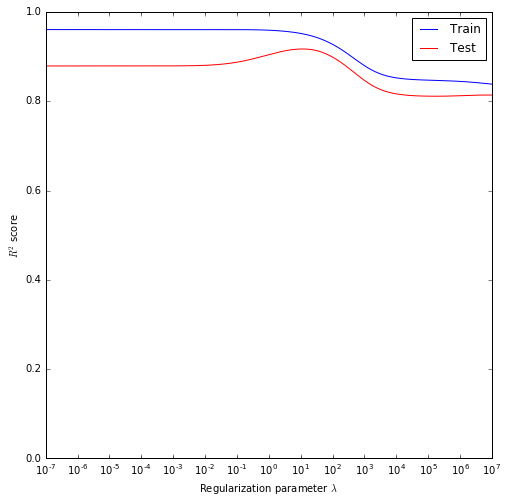

In [48]:
from sklearn.linear_model import Ridge as Ridge_Reg

def MyRidgeReg( x_train, x_test, lambda_min, lambda_max, num_lambda):
   
    num_predictors = x_train.shape[1]

    lambdas= np.linspace(lambda_min,lambda_max, num_lambdas)

    train_r_squared = np.zeros(num_lambdas)
    test_r_squared = np.zeros(num_lambdas)

    coeff_a =np.zeros((num_lambdas, num_predictors))
    
    
    for ind, i in enumerate(lambdas):    
        # Fit ridge/lasso regression on train set
        reg = Ridge_Reg(alpha = 10**i)
        reg.fit(x_train, y_train)


        coeff_a[ind,:] = reg.coef_
        # Evaluate train & test performance
        train_r_squared[ind] = reg.score(x_train, y_train)
        test_r_squared[ind] = reg.score(x_test, y_test)
    
    
        ind = ind + 1
    return train_r_squared, test_r_squared, coeff_a, lambdas
    
def PlotR2( lambdas, train_r_squared, test_r_squared):
    # Plot train an test R-squared as a function parameter value
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    #ax.axhline(y = test_r_squared_plain, c='g', label = 'Plain Regression')
    ax.semilogx(10.0**lambdas, (train_r_squared), c='b', label='Train')
    ax.semilogx(10.0**lambdas, (test_r_squared), c='r', label='Test')


    ax.set_xlabel('Regularization parameter $\lambda$')
    ax.set_ylabel(r'$R^2$ score')
    ax.set_ylim((0, 1))
    ax.legend(loc = 'best')

    r_sq_max_lamb = np.argmax(test_r_squared)   
    print 'Test R^2 score is maximum at lambda', \
    np.round(lambdas[r_sq_max_lamb], 3), \
    'and yields test R^2 score', \
    np.round(max(test_r_squared), 2)


    plt.show()


# Split final version of data into training/test data sets
train, test = sk_split(data, test_size = 0.3)

#Set dependent variables and predictors
y_train = train['SalePrice']
y_test = test['SalePrice']
x_train = train.drop(['SalePrice'], axis=1)
x_test = test.drop(['SalePrice'], axis=1)

# Run for different values of lambda 
lambda_min = -7
lambda_max = 7

num_lambdas = 2000

#create arrays for R2 scores
train_r_squared = np.zeros(num_lambdas)
test_r_squared = np.zeros(num_lambdas)

train_r_squared, test_r_squared, coeff_a, lambdas= MyRidgeReg(x_train, x_test, lambda_min, lambda_max, num_lambdas)
PlotR2(lambdas,train_r_squared, test_r_squared )

Now let's also use cross-validation instead of one single testing and assessing test R square performance to tune lambda:

In [22]:
# using cross-validation instead of one single testing and training set

def MyRidgeReg2(lambda_min, lambda_max, num_lambda):
    num_predictors = x_train.shape[1]
    lambdas= np.linspace(lambda_min,lambda_max, num_lambdas)
    # train_r_squared = np.zeros(num_lambdas)
    test_r_squared = np.zeros(num_lambdas)

    coeff_a =np.zeros((num_lambdas, num_predictors))
    
    for ind, i in enumerate(lambdas):    
        reg = Ridge_Reg(alpha = 100**i)
        scores = cvscore(reg, x, y, cv=10) #10-fold cross validation
        coeff_a[ind,:] = np.mean(scores)
        test_r_squared[ind] = np.mean(scores)
    
        ind = ind + 1
    return test_r_squared, lambdas

Test R^2 score is maximum at lambda 0.525 and yields test R^2 score 0.92


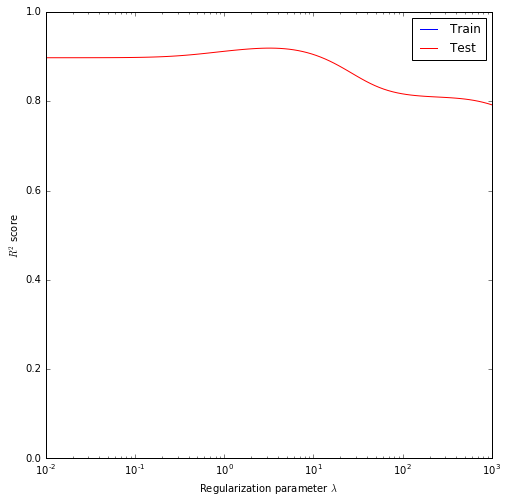

In [33]:
# limiting the scope of the analysis for the regularization parameter
lambda_min = -2
lambda_max = 3

num_lambdas = 100

train_r_squared = np.zeros(num_lambdas)
test_r_squared = np.zeros(num_lambdas)

test_r_squared, lambdas= MyRidgeReg2(lambda_min, lambda_max, num_lambdas)
PlotR2(lambdas,train_r_squared, test_r_squared )

It seems that optimum lambda value has changed when we used cross validation. Since we will make our prediction with CV, it is better to use this lambda value. 

### Lasso Regression

Now we will employ Lasso regression with cross validation to see if it performs better than Ridge on test set: 

In [46]:
from sklearn.linear_model import Lasso

def DoLasso(lambda_min, lambda_max, num_lambda):
    num_predictors = x_train.shape[1]
    lambdas= np.linspace(lambda_min,lambda_max, num_lambdas)
    # train_r_squared = np.zeros(num_lambdas)
    test_r_squared = np.zeros(num_lambdas)

    coeff_a =np.zeros((num_lambdas, num_predictors))
    
    for ind, i in enumerate(lambdas):    
        reg = Lasso(alpha = 10**i, selection='random')
        scores = cvscore(reg, x, y, cv=10) #10-fold cross validation
        coeff_a[ind,:] = np.mean(scores)
        test_r_squared[ind] = np.mean(scores)
    
        ind = ind + 1
    return test_r_squared, lambdas


Test R^2 score is maximum at lambda 1.444 and yields test R^2 score 0.92


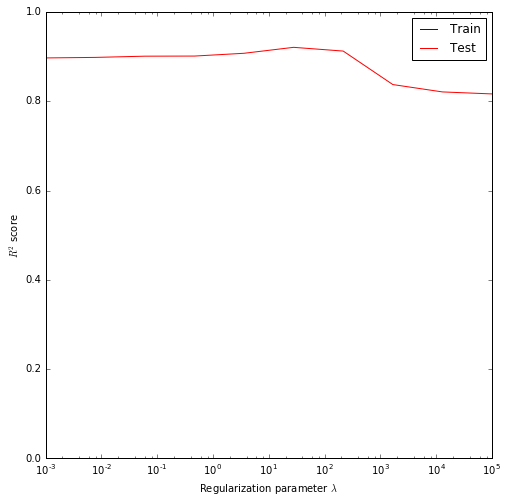

In [49]:
lambda_min = -3
lambda_max = 5

num_lambdas = 10

train_r_squared = np.zeros(num_lambdas)
test_r_squared = np.zeros(num_lambdas)

test_r_squared, lambdas= DoLasso(lambda_min, lambda_max, num_lambdas)
PlotR2(lambdas,train_r_squared, test_r_squared )

It seems that performance does not improve compared to Ridge. 
Now we will use Lasso to optimize number of variables and determine the ideal number of variables.

In [50]:
#Lasso

reg = Lasso(alpha = 0.9, selection='random')
reg.fit(x,y)
# print reg.get_params()
print 'Number of variables for best Lasso fit:', len(np.nonzero(reg.coef_)[0])

reg = Lasso(alpha = 200000000, selection='random')
reg.fit(x,y)
# print reg.get_params()
#print len(np.nonzero(reg.coef_)[0])
#print np.nonzero(reg.coef_)[0]
scores = cvscore(reg, x, y, cv=10) #10-fold cross validation
print 'Top', len(np.nonzero(reg.coef_)[0]) ,'variables (score = ', np.round(np.mean(scores),3) ,')'
print data.columns.values[np.nonzero(reg.coef_)[0]]

Number of variables for best Lasso fit: 365
Top 9 variables (score =  0.806 )
[51104.25 'LotArea2' 'GrLivArea2' 'BsmtUnfSF2' '1stFlrSF2' 'BsmtFinSF12'
 'LotFrontage2' 'EnclosedPorch2' 'ScreenPorch2']


### Plot number of variables vs. R square

..................................................Variables
4.0      0.572856
5.0      0.596284
6.0      0.643333
7.0      0.773247
8.0      0.801597
9.0      0.807504
11.0     0.807886
12.0     0.808687
13.0     0.808890
15.0     0.811074
16.0     0.811662
17.0     0.813505
18.0     0.815294
21.0     0.815333
23.0     0.815592
25.0     0.817381
26.0     0.818858
27.0     0.820128
28.0     0.820614
29.0     0.821147
30.0     0.821022
32.0     0.821744
37.0     0.826094
45.0     0.848764
51.0     0.867767
60.0     0.884460
69.0     0.897433
89.0     0.906583
103.0    0.912836
125.0    0.917564
139.0    0.921580
Name: Score, dtype: float64


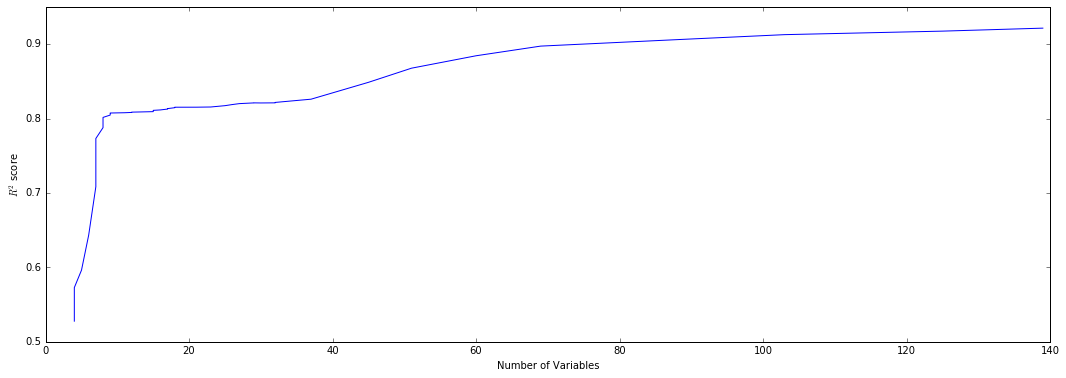

In [51]:
peh = pd.DataFrame(columns=['Lambda','Variables','Score']) # parameter evaluation helper

lambdas= np.linspace(1,5,50)
for l in lambdas:    
    reg = Lasso(alpha = 100**l, selection='random')
    reg.fit(x,y)
    scores = cvscore(reg, x, y, cv=10) #5-fold cross validation, it's slow enough
    #print len(np.nonzero(reg.coef_)[0])
    peh.loc[len(peh)]=[l,len(np.nonzero(reg.coef_)[0]),np.mean(scores)]
    sys.stdout.write('.')
    
#print peh.head(20)
print peh.groupby('Variables')['Score'].max()

plt.rcParams['figure.figsize'] = (18,6)
plt.plot(peh.Variables.values, peh.Score.values)
plt.xlabel('Number of Variables')
plt.ylabel(r'$R^2$ score')
plt.show()

The chart illustrates very well that there is a plateau starting around 9 variables with a very high score slightly above 80% – this is certainly the ‘sweet spot’ if one wants to identify the variables with a reasonable explanatory power. Starting from there the cost for each additional percent is building up quickly in terms of variables. If we want the highest prediction power and R square however, which is our objective, we should progress with all the variables. 

### Ridge Regression with tuned lambda and cross validation

Looks like a lambda value of 0.525 is optimum and increases test R2 score.
Now let's use cross validation to see evaluate our R2 score before we move on to prediction.

negative scores: 1
average, median score: 0.87 , 0.92
average, median positive score: 0.88 , 0.92


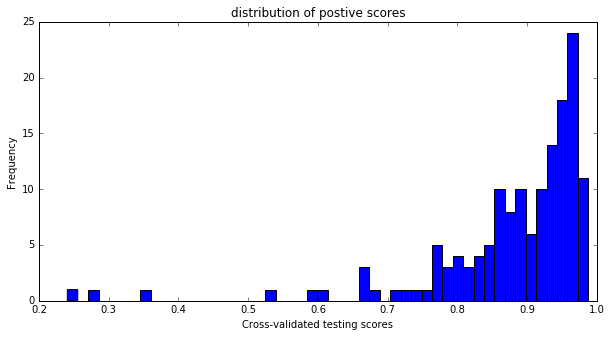

In [34]:
# Looks like a lambda value of 0.525 ıs optimum and increases test R2 score.
#Now let's use cross validation to see how our R2 scores are holding up

RidgeReg = Ridge_Reg(alpha = 0.525)
scores = cvscore(RidgeReg, x, y, cv=150)

# output
print 'negative scores:', len(scores[np.where(scores < 0)])
print 'average, median score:', np.round(np.mean(scores),2),',',np.round(np.median(scores),2)
print 'average, median positive score:', np.round(np.mean(scores[np.where(scores >= 0)]),2),',', np.round(np.median(scores[np.where(scores >= 0)]),2)

plt.figure(figsize=(10,5))
plt.hist(scores[scores>=0],50) 
plt.title('distribution of postive scores')
plt.xlabel('Cross-validated testing scores')
plt.ylabel('Frequency')
plt.show()



Together with the implementation of Ridge Regression with cross validation and tuned hyperparameter, we have no negative scores and our R2 scores are high. We can now progress to predicting house prices.

<span style="font-size:1.7em;"><a id='prediction'></a>  e. Prediction</span> 

Together with the implementation of Ridge Regression with cross validation and tuned hyperparameter, we have no negative scores and our R2 scores are high. Now let's predict housing prices with this model and evaluate performance by visualizing the residuals. 

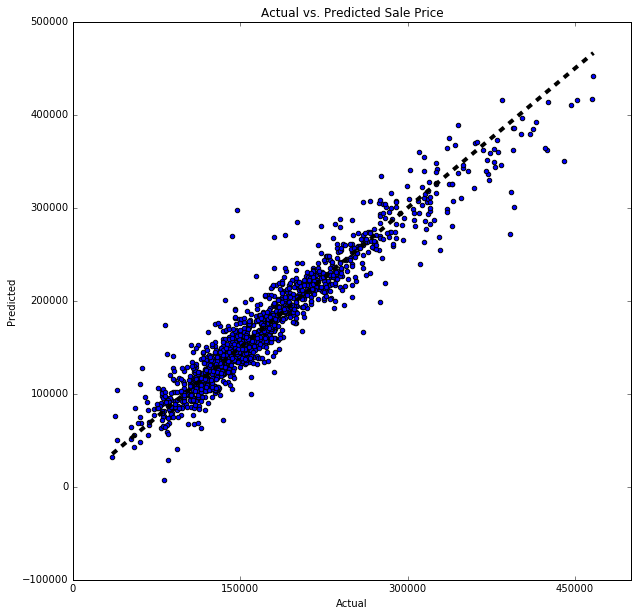

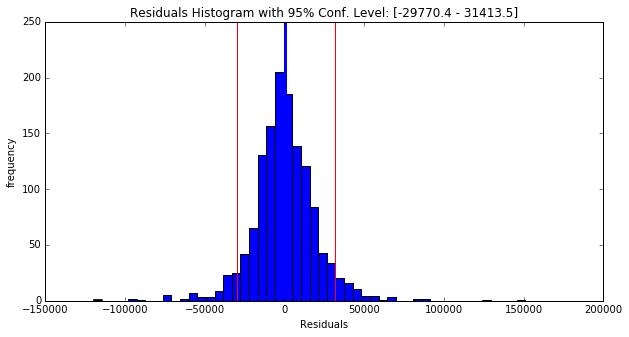

In [35]:
from sklearn.cross_validation import cross_val_predict

#Predict sale price using cross validation
y_predicted = cross_val_predict(RidgeReg, x, y, cv=150)

plt.figure(figsize=(10,10))
plt.scatter(y,y_predicted )
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.title('Actual vs. Predicted Sale Price')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.xticks(np.arange(0, max(y), 150000))
plt.xlim(0)
plt.show()

#Plot residuals to assess performance of the model
residuals = y_predicted - y

# Compute mean for the j-th coefficent from subsamples
res_mean = np.mean(residuals)
    
# Compute confidence interval at 95% confidence level (use formula!)
res_left = np.percentile(residuals, 5)
res_right = np.percentile(residuals, 95)

plt.figure(figsize=(10,5))
plt.hist(residuals,50) 
plt.axvline(x = res_mean, linewidth=3)
plt.axvline(x = res_left, linewidth=1, c='r')
plt.axvline(x = res_right, linewidth=1, c='r')
plt.title('Residuals Histogram with 95% Conf. Level: [' + str(round(res_left, 1)) + ' - ' +str(round(res_right, 1)) + ']')
plt.xlabel('Residuals')
plt.ylabel('frequency')
plt.show()


**Residuals histogram looks great with a normal distribution and we can predict housing price within +- $30.000 with 95% confidence level! **

<br> <br> <br> <br> 
<span style="font-size:1.7em;"><a id='appendix'></a>  Appendix</span> 

## Kaggle data

https://www.kaggle.com/c/house-prices-advanced-regression-techniques
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data


## Secondary Data

**Literature review on relevant factors of housing prices**
* http://www.investopedia.com/articles/mortages-real-estate/11/factors-affecting-real-estate-market.asp
* http://www.investopedia.com/articles/retirement/07/baby_boomer_retirement_effects.asp
* https://en.wikipedia.org/wiki/Real_estate_economics 
* http://www.propertylogy.com/knowledge/10-timeless-factors-that-affect-property-price/
* http://www.economicshelp.org/blog/377/housing/factors-that-affect-the-housing-market/
* http://journalistsresource.org/studies/economics/real-estate/the-impact-of-crime-on-property-values-research-roundup
* https://www.google.ca/url?sa=t&rct=j&q=&esrc=s&source=web&cd=10&ved=0ahUKEwiepoGJ6YLQAhWF5YMKHXujDVoQFghgMAk&url=http%3A%2F%2Fwww.nbs.sk%2F_img%2FDocuments%2FBIATEC%255CBIA03_09%255C03_1.pdf&usg=AFQjCNHlHZWvBryvavS1zqeUgqpoWTZ5bw&sig2=XOxK_GEoWTKz8A4kP7KfKw&cad=rja
* https://www.google.ca/url?sa=t&rct=j&q=&esrc=s&source=web&cd=12&ved=0ahUKEwiow67w7ILQAhWj5oMKHVsTAT04ChAWCCIwAQ&url=http%3A%2F%2Fwww.ctrealtor.com%2Funprotected%2FCh01.pdf&usg=AFQjCNGEjvIaD4uQYuRLX5trr0eKRnQSiQ&sig2=17zKkgv-Ol_ZL_MqhzldNA&bvm=bv.136811127,d.amc&cad=rja


**Data sources for contextual data**
* Economics (GDP, personal income): http://www.bea.gov/regional/downloadzip.cfm
* Security: http://www.ucrdatatool.gov/Search/Crime/Crime.cfm
* Mortgage rates: http://www.hsh.com/monthly-mortgage-rates.html
* Employment and labour force: http://www.bls.gov/cps/tables.htm, http://www.bls.gov/regions/midwest/ia_ames_msa.htm
* Consumer price index: http://www.bls.gov/regions/midwest/data/xg-tables/ro5xg01.htm

**Secondary data legend**
* GDP_IC 23: Construction
* GDP_IC 42: Wholesale trade
* GDP_IC 51: Information
* GDP_IC 52: Finance and insurance
* GDP_IC 53: Real estate and rental and leasing
* GDP_IC 54: Professional, scientific, and technical services
* GDP_IC 55: Management of companies and enterprises
* GDP_IC 56: Administrative and waste management services
* GDP_IC 61: Educational services
* GDP_IC 62: Health care and social assistance
* GDP_IC 71: Arts, entertainment, and recreation
* GDP_IC 72: Accommodation and food services
* GDP_IC 81: Other services, except government
* GDP_IC 92: Government

* PIPC: personal income per capita, $, Story IA
		
* CR01: Violent crime total
* CR02: Murder and nonnegligent Manslaughter
* CR03: Forcible rape
* CR04: Robbery
* CR05: Aggravated assault
* CR06: Property crime total
* CR07: Burglary
* CR08: Larceny-theft
* CR09:	Motor vehicle theft
	
* MR_30Y: 30 year mortgage rate
* MR_30Y_06: 30 year mortgage rate, june reading
		
* LF_POP: Labour force, percentage of population
* LF_POP_NA: Labour force, percentage of population, non-agricultural
* LF_POP_M: Labour force, percentage of population, men
* LF_POP_M_NA: Labour force, percentage of population, men, non-agricultural
* LF_POP_F: Labour force, percentage of population, women
* LF_POP_F_NA: Labour force, percentage of population, women, non-agricultural
		
* LF_NF_06: Labour force, non-farm, June data
* LF_NF_YA: Labour force, non-farm, yearly average
* LF_TOT_06: Labour force, total, June data
* LF_TOT_YA: Labour force, total, yearly average
		
* CPI_MW_06: Consumer Price Index, Midwest, June
* CPI_MW_AN: Consumer Price Index, Midwest, Annual